In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv


In [7]:
# 📌 Clustering with K-Means
# Objective: Perform unsupervised learning with K-Means clustering.

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [8]:
DATA_PATH = os.path.join("/kaggle", "input", "customer-segmentation-tutorial-in-python", "Mall_Customers.csv")
if not os.path.exists(DATA_PATH):
    raise FileNotFoundError(f"Dataset not found at '{DATA_PATH}'. Please download mall-customers CSV and place it there.")
df = pd.read_csv(DATA_PATH)
print(df.head())
# Select relevant features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


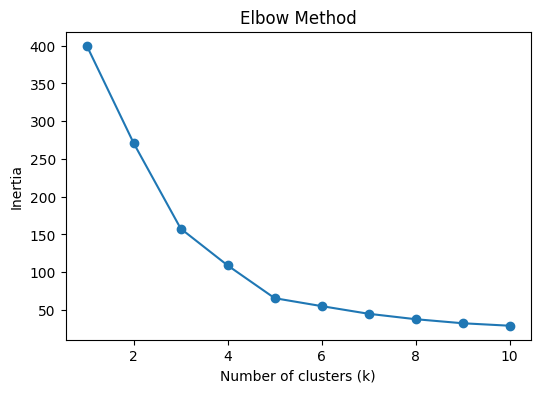

In [9]:
# 2. Elbow Method to find optimal K
inertias = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K_range, inertias, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [11]:
# 3. Fit KMeans with optimal K (say k=5 after inspecting the elbow)
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_scaled)
df['Cluster'] = labels

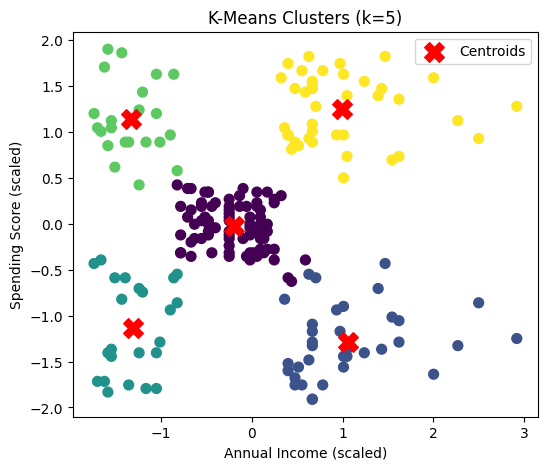

In [12]:
# 4. Visualize clusters
plt.figure(figsize=(6,5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title(f'K-Means Clusters (k={optimal_k})')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.legend()
plt.show()

In [13]:
# 5. Evaluate clustering
score = silhouette_score(X_scaled, labels)
print(f"Silhouette Score: {score:.3f}")

Silhouette Score: 0.555
